# Tarea 7
José Antonio Duarte Mendieta

# Ejercicio 1

In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wishart
import pandas as pd
import scipy.stats as sp 
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
valsG = np.linspace(0,1.45,1000)
r = 0.5
q = 0.5
def Rtrue(g,f = (1/1.5)):
  return (g**2/f)*(1 / (1+r))
valsRtrue = Rtrue(valsG)
def RinERI(g, f = (1/1.5)):
  return (g**2/f)*((r+q)/((1+r)*(r+q*(r+1))))
valsRinERI =  RinERI(valsG)

def RoutERI(g, f = (1/1.5)):
  return (g**2/f)*((r+q+r*q)/((r+q)*((r+1))))
valsRoutERI = RoutERI(valsG)
valsRinE = valsRtrue * (1-q)
valsRoutE = valsRtrue / (1-q)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


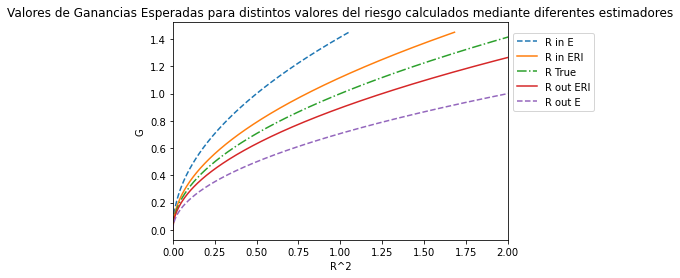

In [3]:
plt.plot(valsRinE, valsG,'--', label = f"R in E")
plt.plot(valsRinERI, valsG, label = f"R in ERI")
plt.plot(valsRtrue, valsG, '-.',label = f"R True")
plt.plot(valsRoutERI, valsG, label = f"R out ERI")
plt.plot(valsRoutE, valsG, '--', label = f"R out E")

plt.xlim((0, 2)) 
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.title("Valores de Ganancias Esperadas para distintos valores del riesgo calculados mediante diferentes estimadores")
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

# Ejercicio 2

In [4]:
def Rtrue(G, Sigma, g):
    return G**2 / (g.T@np.linalg.inv(Sigma)@g).flatten()
def Rin(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def Rout(G, E, Sigma, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@Sigma@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


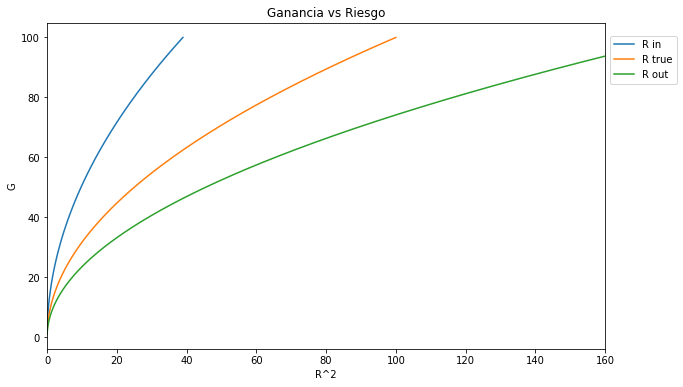

In [5]:
np.random.seed(seed=13)
n = 200 
p = 100 
g = np.ones((p,1)) 
valsG = np.linspace(1,100,1000)
Sigma = np.identity(p)
w = wishart.rvs (df=n, scale=0.2, size =(p,n), random_state = None)

E = np.corrcoef(w)

R_true = Rtrue(valsG,Sigma,g) # True
R_in = Rin(valsG,E,g) # In-sample
R_out = Rout(valsG,E, Sigma, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((0, 160)) 
plt.plot(R_in.flatten(), valsG, label ="R in")
plt.plot(R_true.flatten(), valsG, label ="R true")
plt.plot(R_out.flatten(), valsG, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


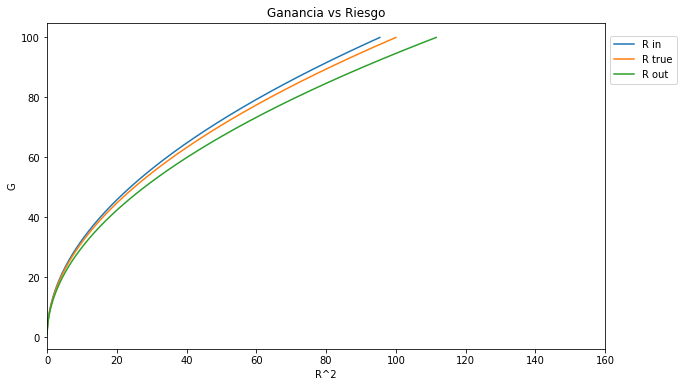

In [6]:
n = 1000
valsG = np.linspace(1,100,1000)
Sigma = np.identity(p)
w = wishart.rvs (df=n, scale=0.2, size =(p,n), random_state = None)

E = np.corrcoef(w)

R_true = Rtrue(valsG,Sigma,g) # True
R_in = Rin(valsG,E,g) # In-sample
R_out = Rout(valsG,E, Sigma, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((0, 160)) 
plt.plot(R_in.flatten(), valsG, label ="R in")
plt.plot(R_true.flatten(), valsG, label ="R true")
plt.plot(R_out.flatten(), valsG, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))


NOtar que entre más grande es el valor de n, menor se vuelve la diferencia entre el valor de R true y los estimadores R in y R out, lo que indicaría que estos estimandos mejoran mientras más datos históricos se utilicen para calcularlos. Este también es el caso en el que q se hace más pequeño.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


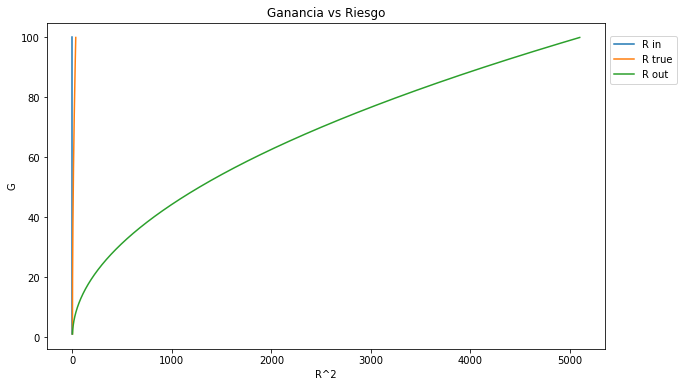

In [7]:
np.random.seed(seed=8)
n = 200 # Longitud Activos
p = 300 # Activos
g = np.ones((p,1)) # Retorno esperado
valsG = np.linspace(1,100,1000)
Sigma = np.identity(p)
w = wishart.rvs (df=n, scale=0.2, size =(p,n), random_state = None)

E = np.corrcoef(w)

R_true = Rtrue(valsG,Sigma,g) # True
R_in = Rin(valsG,E,g) # In-sample
R_out = Rout(valsG,E, Sigma, g) # Out-sample
fig = plt.figure(figsize = (10, 6))

plt.plot(R_in.flatten(), valsG, label ="R in")
plt.plot(R_true.flatten(), valsG, label ="R true")
plt.plot(R_out.flatten(), valsG, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


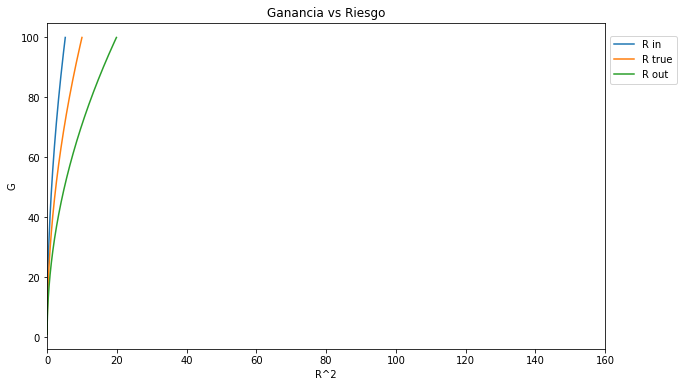

In [8]:
n = 2000 # Longitud Activos
p = 1000 # Activos
g = np.ones((p,1)) # Retorno esperado
valsG = np.linspace(1,100,1000)
Sigma = np.identity(p)
w = wishart.rvs (df=n, scale=0.2, size =(p,n), random_state = None)

E = np.corrcoef(w)

R_true = Rtrue(valsG,Sigma,g) # True
R_in = Rin(valsG,E,g) # In-sample
R_out = Rout(valsG,E, Sigma, g) # Out-sample
fig = plt.figure(figsize = (10, 6))

plt.plot(R_in.flatten(), valsG, label ="R in")
plt.plot(R_true.flatten(), valsG, label ="R true")
plt.plot(R_out.flatten(), valsG, label ="R out")
plt.xlim((0, 160)) 
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


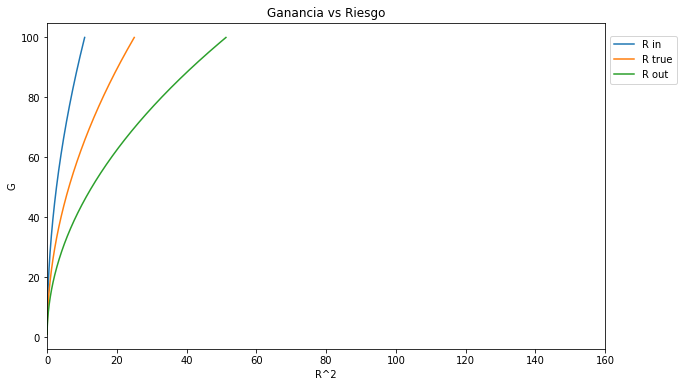

In [9]:
n = 200 # Longitud Activos
p = 100 # Activos
g = np.ones((p,))*2 # Retorno esperado
valsG = np.linspace(1,100,1000)
Sigma = np.identity(p)
w = wishart.rvs (df=n, scale=0.2, size =(p,n), random_state = None)

E = np.corrcoef(w)

R_true = Rtrue(valsG,Sigma,g) # True
R_in = Rin(valsG,E,g) # In-sample
R_out = Rout(valsG,E, Sigma, g) # Out-sample
fig = plt.figure(figsize = (10, 6))

plt.plot(R_in.flatten(), valsG, label ="R in")
plt.plot(R_true.flatten(), valsG, label ="R true")
plt.plot(R_out.flatten(), valsG, label ="R out")
plt.xlim((0, 160)) 
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


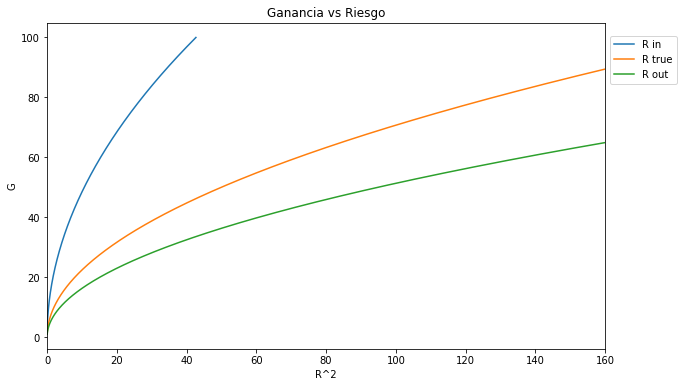

In [10]:
n = 200 # Longitud Activos
p = 100 # Activos
g = np.ones((p,)) # Retorno esperado
valsG = np.linspace(1,100,1000)
Sigma = np.identity(p)
w = wishart.rvs (df=n, scale=0.2, size =(p,n), random_state = None)

E = np.corrcoef(w)

R_true = Rtrue(valsG,2*Sigma,g) # True
R_in = Rin(valsG,E,g) # In-sample
R_out = Rout(valsG,E,2* Sigma, g) # Out-sample
fig = plt.figure(figsize = (10, 6))

plt.plot(R_in.flatten(), valsG, label ="R in")
plt.plot(R_true.flatten(), valsG, label ="R true")
plt.plot(R_out.flatten(), valsG, label ="R out")
plt.xlim((0, 160)) 
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

# Ejercicio 3

In [11]:
Stock_Prices = ['WFC',
 'FEMSAUBD.MX',
 'T',
 'CS',
 'KIMBERA.MX',
 'ADI',
 'ACIW',
 'AA',
 'ARR',
 'ALSEA.MX',
 'CL=F',
 'AIG',
 'AMZN',
 'ACN',
 'AES',
 'AZN',
 'LLY',
 'ADSK',
 'GOOG',
 'CX',
 'ACAD',
 'NFLX',
 'AMAT',
 'GFINBURO.MX',
 'BIMBOA.MX',
 'BUD',
 'AMXL.MX',
 'AAL',
 'AMP',
 'DOGE-USD',
 'GC=F',
 'WMT.MX',
 'ABBV',
 'ABT',
 'GMEXICOB.MX',
 'AEO',
 '^TNX',
 'M',
 'AXP',
 'KO',
 'AAPL',
 'BDX',
 'WBA',
 'AAP',
 'GM',
 'PAA',
 'TSLA',
 'NVDA',
 'AB',
 'NLY']


In [12]:
raw = yf.download(Stock_Prices,"2020-01-01","2020-12-31") 
precios_cierre = pd.DataFrame(raw.Close).dropna().iloc[:201,:]
retpor = np.diff(precios_cierre, axis = 0)/precios_cierre.iloc[:-1,:]

[*********************100%***********************]  50 of 50 completed


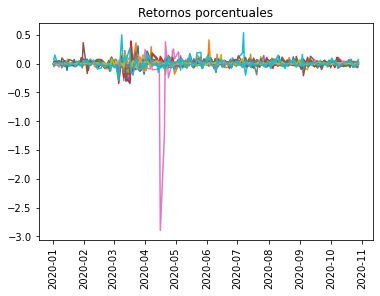

In [13]:
plt.title('Retornos porcentuales')
plt.plot(retpor) 
plt.xticks(rotation=90) 
plt.show()

In [14]:
agregado_por_dia = retpor.sum(axis=1)

Text(0.5, 1.0, 'Distribución de retornos acumulados por día')

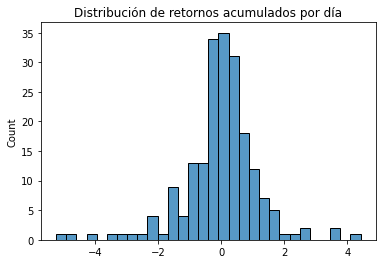

In [15]:
sns.histplot(agregado_por_dia)
plt.title("Distribución de retornos acumulados por día")

In [16]:
print(np.mean(agregado_por_dia))
print(np.std(agregado_por_dia))
print(sp.skew(agregado_por_dia))
print(sp.kurtosis(agregado_por_dia))
print(adfuller(agregado_por_dia)[1])
print(sp.stats.jarque_bera(agregado_por_dia)[1])

-0.011311120187746715
1.204461231370131
-0.5969521005549697
4.018059663158554
9.668823382634992e-11
0.0


In [17]:
estadisticos_descriptivos=retpor .describe()
kurtosis=sp.kurtosis(retpor,axis=0)
asimetria=sp.skew(retpor,axis=0)
raiz_unitaria_p_val = []
jarque_bera =[]
for i in range(0, 50):
  resultado_adfuller = adfuller(retpor.iloc[:,i])
  raiz_unitaria_p_val.append(resultado_adfuller[1])
  resultado_jarque = sp.stats.jarque_bera(retpor.iloc[:,i])
  jarque_bera.append(resultado_jarque[1])
estadisticos_descriptivos.loc['kurtosis'] = kurtosis
estadisticos_descriptivos.loc['asimetria'] = asimetria
estadisticos_descriptivos.loc['p_val_ru'] = raiz_unitaria_p_val
estadisticos_descriptivos.loc['p_val_jb'] = jarque_bera
estadisticos_descriptivos.drop(index=['count', 'min', '25%', '50%', '75%', 'max'])

,AA,AAL,AAP,AAPL,AB,ABBV,ABT,ACAD,ACIW,ACN,ADI,ADSK,AEO,AES,AIG,ALSEA.MX,AMAT,AMP,AMXL.MX,AMZN,ARR,AXP,AZN,BDX,BIMBOA.MX,BUD,CL=F,CS,CX,DOGE-USD,FEMSAUBD.MX,GC=F,GFINBURO.MX,GM,GMEXICOB.MX,GOOG,KIMBERA.MX,KO,LLY,M,NFLX,NLY,NVDA,PAA,T,TSLA,WBA,WFC,WMT.MX,^TNX
mean,-0.001125,-2.401747e-03,4.344825e-05,2.619702e-03,1.044287e-03,-2.456512e-04,1.267521e-03,1.329857e-03,-7.030177e-04,0.000536,3.986814e-04,0.001861,1.084100e-03,6.387700e-04,-1.322995e-03,-0.003797,4.956854e-04,0.000716,-6.294112e-04,2.933393e-03,-1.480276e-03,-0.000772,3.054750e-04,-5.099954e-04,1.141363e-03,-1.656371e-03,-1.782943e-02,-1.267696e-03,1.188440e-03,2.941029e-03,-2.038409e-03,1.105404e-03,-1.804340e-03,5.559172e-04,9.566772e-04,1.007620e-03,-5.114825e-04,-4.204133e-04,3.403540e-04,-3.099430e-03,2.559013e-03,-0.000546,4.561434e-03,-3.064008e-03,-0.001591,9.852701e-03,-2.364023e-03,-3.922232e-03,0.001763,-0.001456
std,0.054251,7.066050e-02,3.092428e-02,3.086048e-02,4.688394e-02,2.339343e-02,2.561553e-02,3.502332e-02,3.464401e-02,0.028078,3.105080e-02,0.033969,5.071501e-02,3.885358e-02,4.816994e-02,0.043209,3.783351e-02,0.044317,2.196557e-02,2.464107e-02,5.646457e-02,0.041535,2.192193e-02,2.372319e-02,2.999998e-02,3.374255e-02,2.330535e-01,3.582994e-02,4.523440e-02,6.038537e-02,2.071888e-02,1.385630e-02,3.311225e-02,4.230514e-02,2.758144e-02,2.556040e-02,2.411869e-02,2.262712e-02,2.589777e-02,5.978594e-02,2.966116e-02,0.042663,3.697450e-02,6.865369e-02,0.023381,6.406652e-02,3.057586e-02,3.829998e-02,0.025216,0.073529
kurtosis,5.040744,8.844953e+00,5.506843e+00,2.502464e+00,1.437390e+01,8.274610e+00,2.856722e+00,4.094234e+00,3.475822e+00,3.356735,3.392107e+00,3.943983,2.552348e+00,4.132551e+00,4.358162e+00,15.255255,2.466480e+00,6.602527,1.579931e+00,8.629426e-01,1.297080e+01,6.720396,2.448362e+00,4.723000e+00,3.658377e+00,2.317711e+00,1.183758e+02,4.269722e+00,1.057585e+00,3.289242e+01,4.392883e+00,3.870814e+00,2.359039e+00,4.738535e+00,9.045598e-01,2.272638e+00,2.959296e+00,2.953871e+00,9.521539e+00,2.156474e+00,1.389808e+00,15.115538,2.346157e+00,1.179644e+01,4.065035,5.547990e+00,2.537769e+00,2.889820e+00,6.919008,11.903338
asimetria,0.292188,1.460009e+00,-5.196325e-01,1.601111e-01,3.130595e-01,-7.497568e-01,4.757376e-01,-7.630087e-01,-2.797989e-01,0.597957,5.573713e-02,-0.034134,2.944375e-01,-5.501080e-01,-6.590980e-01,-2.155172,-1.797510e-01,0.787916,-1.314692e-01,9.284808e-02,-5.994327e-01,0.897187,2.417235e-01,-9.226596e-01,4.948314e-01,-4.129832e-01,-1.019175e+01,-3.172149e-02,3.576907e-01,2.904360e+00,5.608177e-01,1.794611e-01,-3.192249e-01,-1.895701e-01,8.500842e-02,-8.471100e-03,4.472464e-01,-4.793117e-01,1.270286e+00,1.434400e-01,3.405846e-01,0.811733,1.410176e-01,-3.548100e-01,0.125138,5.390523e-01,1.650769e-01,1.484975e-01,1.337490,1.367591
p_val_ru,0.000127,5.272439e-08,5.541474e-11,3.549001e-30,1.996034e-09,7.140662e-09,8.681406e-16,7.968468e-26,5.257591e-28,0.010256,2.236144e-11,0.000032,1.708346e-26,8.574710e-29,3.933015e-11,0.000018,8.921704e-11,0.028962,9.154369e-28,1.218795e-28,4.872801e-08,0.000002,6.266269e-29,3.071657e-27,5.688116e-18,9.338607e-23,6.755912e-19,3.726216e-09,1.716820e-26,5.463754e-24,9.768972e-21,2.428294e-12,2.976328e-26,2.803238e-12,2.916151e-23,0.000000e+00,5.356066e-15,2.401581e-11,4.915639e-14,1.490936e-18,4.250724e-30,0.003375,2.424204e-10,3.558763e-10,0.000002,2.465581e-10,3.581722e-06,3.048517e-28,0.000172,0.000007
p_val_jb,0.000000,0.000000e+00,0.000000e+00,3.036571e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,3.838041e-13,0.000000e+00,0.000000e+00,0.000000,5.722978e-12,0.000000,2.279832e-05,3.891130e-02,0.000000e+00,0.000000,5.366596e-12,0.000000e+00,0.000000e+00,1.108957e-11,0.000000e+00,0.000000e+00,1.121898e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.556211e-11,0.000000e+00,2.931295e-02,4.501053e-10,0.000000e+00,0.000000e+00,0.000000e+00,2.728528e-09,4.624794e-05,0.000000,7.859902e-11,0.000000e+00,0.000000,0.000000e+00,1.408318e-12,5.551115e-16,0.0000

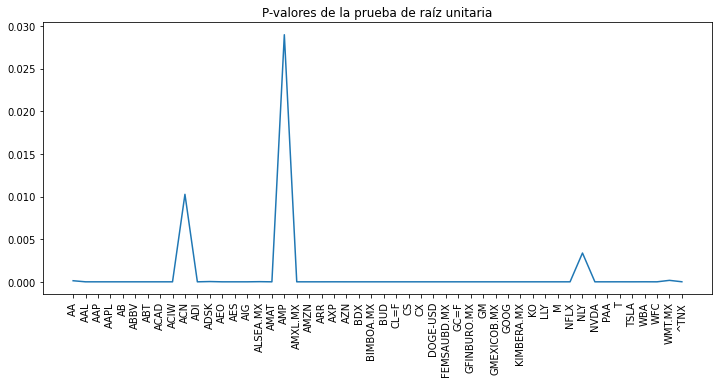

In [18]:
fig = plt.figure(figsize = (12, 5))
plt.title('P-valores de la prueba de raíz unitaria')
plt.xticks(rotation=90) 
plt.plot(estadisticos_descriptivos.loc['p_val_ru'])

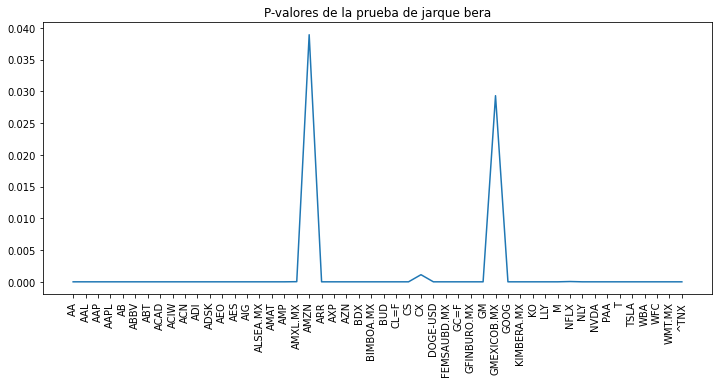

In [19]:
fig = plt.figure(figsize = (12, 5))
plt.title('P-valores de la prueba de jarque bera')
plt.xticks(rotation=90) 
plt.plot(estadisticos_descriptivos.loc['p_val_jb'])

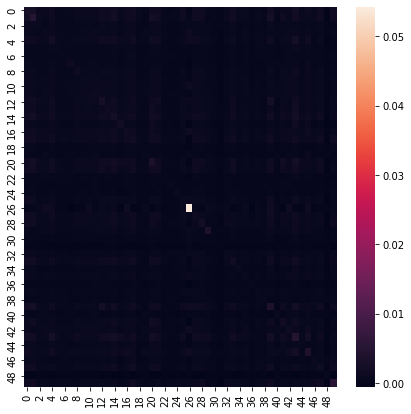

In [20]:
cov_m = np.cov(retpor.T)
fig = plt.figure(figsize = (7, 7))
ax = sns.heatmap(cov_m)

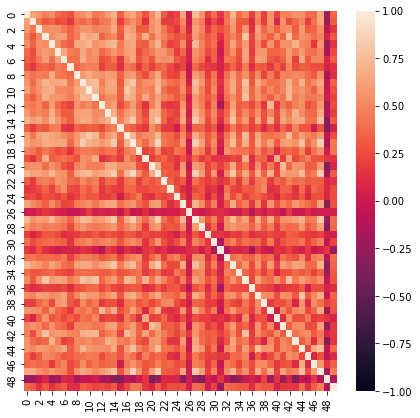

In [21]:
cov_m = np.corrcoef(retpor.T)
fig = plt.figure(figsize = (7, 7))
ax = sns.heatmap(cov_m, vmin=-1, vmax=1)

In [22]:
ret_centrados = (retpor - retpor.mean())
ret_est = ret_centrados.div(np.sqrt((ret_centrados**2).sum(axis = 1)).iloc[0], axis='columns')

In [23]:
P1 = np.array(ret_est.iloc[:100, :])
P2 = np.array(ret_est.iloc[100:, :])

In [24]:
E_in = np.corrcoef(P1.T)
val_prop, vect_prop = np.linalg.eigh(E_in)
q = 1/2
limite_marc_past = (1 + np.sqrt(q))**2
mayores_limite = val_prop[val_prop>= limite_marc_past]
constante_sustitucion = (np.trace(E_in) -np.sum(mayores_limite))/(len(val_prop) - len(mayores_limite))
val_prop_clippling = []
for val in val_prop:
  if val < limite_marc_past:
    val_prop_clippling.append(constante_sustitucion)
  else:
    val_prop_clippling.append(val)

estimador_clipping_in = vect_prop@np.diag(val_prop_clippling)@vect_prop.T
g = np.ones((50,1))
R_in_E = Rin(valsG,E_in,g) 
R_in_clipping = Rin(valsG,estimador_clipping_in,g)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


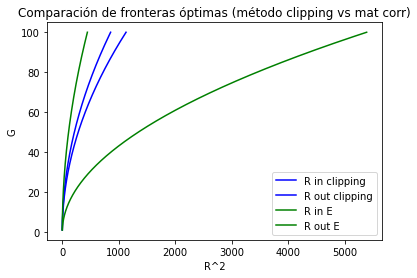

In [25]:

E_out = np.corrcoef(P2.T)
val_prop, vect_prop = np.linalg.eigh(E_out)
q = 1/2
limite_marc_past = (1 + np.sqrt(q))**2
mayores_limite = val_prop[val_prop>= limite_marc_past]
constante_sustitucion = (np.trace(E_out) -np.sum(mayores_limite))/(len(val_prop) - len(mayores_limite))
val_prop_clippling = []
for val in val_prop:
  if val < limite_marc_past:
    val_prop_clippling.append(constante_sustitucion)
  else:
    val_prop_clippling.append(val)

estimador_clipping_out = vect_prop@np.diag(val_prop_clippling)@vect_prop.T


def Routsample(G, E_In, E_Out, g):
  return (G**2 * (g.T@np.linalg.inv(E_In)@E_Out@np.linalg.inv(E_In)@g))/((g.T@np.linalg.inv(E_In)@g)**2)
g = np.ones((50,1))

R_out_E = Routsample(valsG,E_in, E_out,g) 

R_out_clipping = Routsample(valsG,estimador_clipping_in,estimador_clipping_out, g)

plt.plot(R_in_clipping.flatten(), valsG,   c ="b", label = "R in clipping") 
plt.plot(R_out_clipping.flatten(), valsG,   c ="b", label = "R out clipping") 
plt.plot(R_in_E.flatten(), valsG,   c ="g", label = "R in E") 
plt.plot(R_out_E.flatten(), valsG,   c ="g", label = "R out E")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.title('Comparación de fronteras óptimas (método clipping vs mat corr)')
plt.legend()



Notar que se puede observar que el estimador cliping produce un gap más cerrado que la matriz de correlación muestral, por lo que el clipping acota de forma más precisa el valor de R true (recordando que Rin y R out acotan el verdadero valor).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


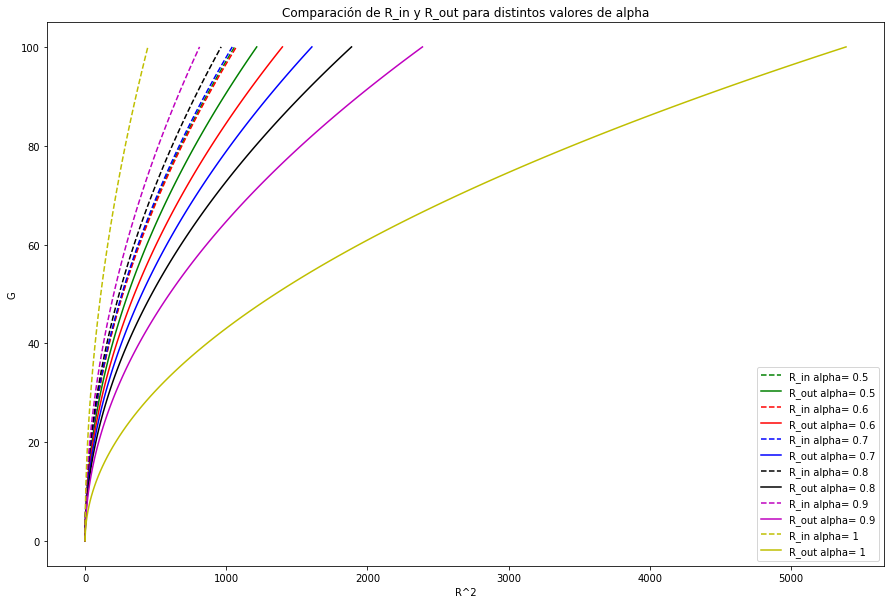

In [26]:
ident = np.identity(50)
E_valin = np.corrcoef(P1.T)
E_valout = np.corrcoef(P2.T)
alphas =[0.5,0.6, 0.7,0.8, 0.9, 1]

colors = ['g', 'r', 'b', 'black', 'm', "y", 'g', 'r', 'aqua']
g = np.ones((50,1))

fig = plt.figure(figsize = (15, 10))
valsG = np.linspace(0,100,100)
def Routsample(G, E_In, E_Out, g):
  return (G**2 * (g.T@np.linalg.inv(E_In)@E_Out@np.linalg.inv(E_In)@g))/((g.T@np.linalg.inv(E_In)@g)**2)
def Rin(G, paramE, g_vals):
   #intentar quitar estr flatten
    return G**2 / (g_vals.T@np.linalg.inv(paramE)@g_vals)
plt.title("Comparación de R_in y R_out para distintos valores de alpha")
for k in range(0,6):

  est_ls_in =  (alphas[k] * E_valin ) + ((1- alphas[k]) * ident)
  est_ls_out = (alphas[k] * E_valout) + ((1- alphas[k]) * ident)
  R_in_alpha = Rin(valsG,est_ls_in,g) 
  R_out_alpha = Routsample(valsG,est_ls_in,est_ls_out, g)
  
  plt.plot(R_in_alpha.flatten(), valsG ,'--' ,color = colors[k], label = f'R_in alpha= {alphas[k]}') 
  plt.plot(R_out_alpha.flatten(), valsG ,  color = colors[k],label = f'R_out alpha= {alphas[k]}') 

ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend()

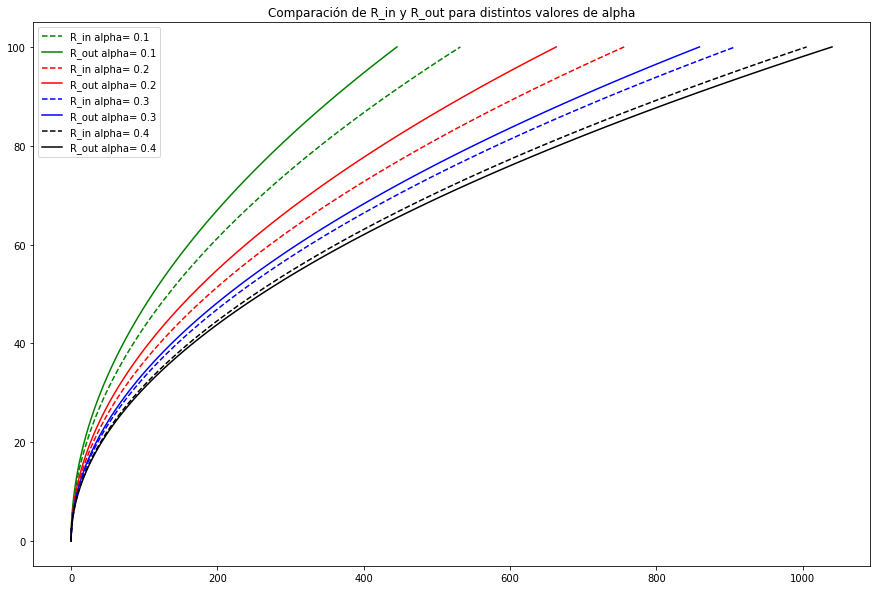

In [27]:
alphas = [0.1,0.2, 0.3, 0.4]
colors = ['g', 'r', 'b', 'black', 'm', "y", 'g', 'r', 'aqua']
g = np.ones((50,1))

fig = plt.figure(figsize = (15, 10))
valsG = np.linspace(0,100,100)
def Routsample(G, E_In, E_Out, g):
  return (G**2 * (g.T@np.linalg.inv(E_In)@E_Out@np.linalg.inv(E_In)@g))/((g.T@np.linalg.inv(E_In)@g)**2)
def Rin(G, paramE, g_vals):
   #intentar quitar estr flatten
    return G**2 / (g_vals.T@np.linalg.inv(paramE)@g_vals)
plt.title("Comparación de R_in y R_out para distintos valores de alpha")
for k in range(0,4):
  ident = np.identity(50)
  E_valin = np.corrcoef(P1.T)
  E_valout = np.corrcoef(P2.T)
  est_ls_in =  (alphas[k] * E_valin ) + ((1- alphas[k]) * ident)
  est_ls_out = (alphas[k] * E_valout) + ((1- alphas[k]) * ident)
  R_in_alpha = Rin(valsG,est_ls_in,g) 
  R_out_alpha = Routsample(valsG,est_ls_in,est_ls_out, g)
  
  plt.plot(R_in_alpha.flatten(), valsG ,'--' ,color = colors[k], label = f'R_in alpha= {alphas[k]}') 
  plt.plot(R_out_alpha.flatten(), valsG ,  color = colors[k],label = f'R_out alpha= {alphas[k]}') 

plt.legend()